<a href="https://colab.research.google.com/github/dGabo-jr/CURSOS-DE-PYTHON/blob/main/%C3%81rdoles_de_Decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ÁRBOLES DE DESICIÓN**

Un diagrama de árbol de decisiones te permite evaluar mediante una representación gráfica los posibles resultados, costos y consecuencias de una decisión compleja. Este método es muy útil para analizar datos cuantitativos y tomar una decisión basada en números.


El diagrama de árbol de decisiones te permite visualizar el impacto que tendrán tus decisiones para así poder determinar el mejor plan de acción

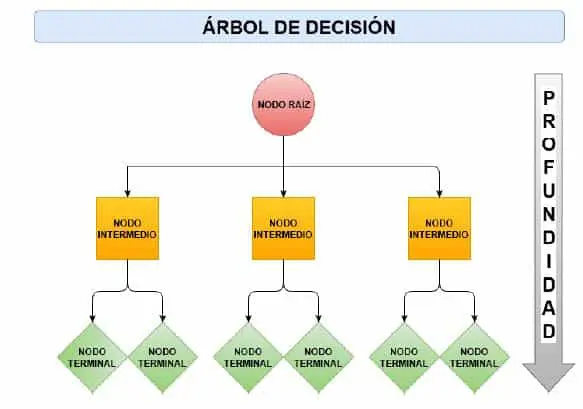

El proceso de construcción de un árbol de decisiones implica elegir las mejores características y divisiones para tomar decisiones óptimas. 
Métricas utilizadas:

 1.-Ganancia de información   (+incertidumbre, +entropía)

 2.-Impureza de Gini

 Estas métricas miden la importancia y la pureza de una característica para clasificar los ejemplos.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [3]:
from google.colab import files
 
 
uploaded = files.upload()
# metodo Utilizado para analizar los datos y ver los sobrevivientes y no  sobrevivientes

Saving Titanic_Datos_limpios_nuevos.csv to Titanic_Datos_limpios_nuevos.csv


In [5]:
df=pd.read_csv("Titanic_Datos_limpios_nuevos.csv")  #leer el archivo
df # visualizamos el dataframe cargado

,Unnamed: 0,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,0,3,0,1,0,0,0
1,1,1,1,1,1,0,3,1
2,2,1,3,1,0,0,0,0
3,3,1,1,1,1,0,3,0
4,4,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...
886,886,0,2,0,0,0,1,0
887,887,1,1,1,0,0,2,0
888,888,0,3,1,1,2,2,0
889,889,1,1,0,0,0,2,1


In [6]:
df.describe()

,Unnamed: 0,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,0.352413,0.523008,0.381594,1.377104,0.361392
std,257.353842,0.486592,0.836071,0.477990,1.102743,0.806057,1.347196,0.635673
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,445.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,667.500000,1.000000,3.000000,1.000000,1.000000,0.000000,3.000000,1.000000
max,890.000000,1.000000,3.000000,1.000000,8.000000,6.000000,5.000000,2.000000


In [7]:
#Dividiendo los datos en X y Y  ( 2 DATA FRAME)
X_data= df.drop (["Unnamed: 0", "Survived"], axis=1)
X_data.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,1,0,0,0
1,1,1,1,0,3,1
2,3,1,0,0,0,0
3,1,1,1,0,3,0
4,3,0,0,0,0,0


In [8]:
y_survived =df["Survived"]
y_survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [9]:
# dividndo datos en train y test
#generando datos de test  (30%) y de entrenamiento del model
X_train, X_test, y_train, y_test = train_test_split(X_data, y_survived, test_size = 0.3, random_state=42)

In [10]:
#creando el modelo de árboles de Decisión
dtcModel=DecisionTreeClassifier(criterion ="entropy", random_state= 0)
dtcModel.fit (X_train,y_train) # entrenando el modelo

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
y_predict=dtcModel.predict(X_test)

In [12]:
# creando y analizando la matriz de confusión
cm= confusion_matrix(y_test,y_predict)
print(cm)

[[144  13]
 [ 39  72]]


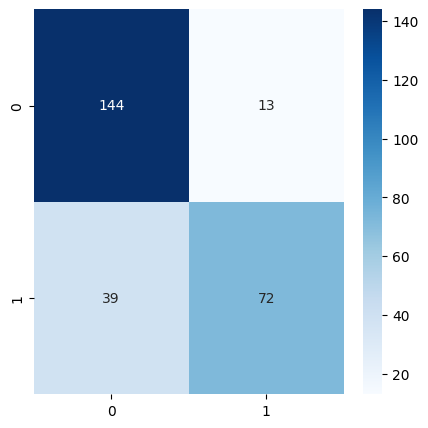

In [13]:
#mostrando la matriz de confusion en diagrama
plt.figure(figsize=(5,5))
sns.heatmap (cm, annot =True, fmt= "g", cmap = "Blues")
plt.show ()

In [14]:
print(classification_report(y_test,y_predict))   # Analizando  las variables (precision    recall  f1-score   support y accuracy(veracidadad del modelo debe estar mas cercano 1 ))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       157
           1       0.85      0.65      0.73       111

    accuracy                           0.81       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



In [15]:
#mostrando el arbol de desicion
export_graphviz(dtcModel, out_file ="arbolTitaniclimpiodeclasificación.dot",filled=True, feature_names = ["Pclass","Sex","SibSp","Parch","Fare","Embarked"])
# una vez ejecutada la  línea, descargarla en tu disco C, das doble click y copias todo su interior a la página http://webgraphviz.com/ y generas el gráfico de árbol de regresión 

In [16]:
from google.colab import files
files.download("arbolTitaniclimpiodeclasificación.dot")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[WEBGRAPHVIZ.COM](http://webgraphviz.com/)

# **ÁRBOL OBTENIDO DEL MODELO**





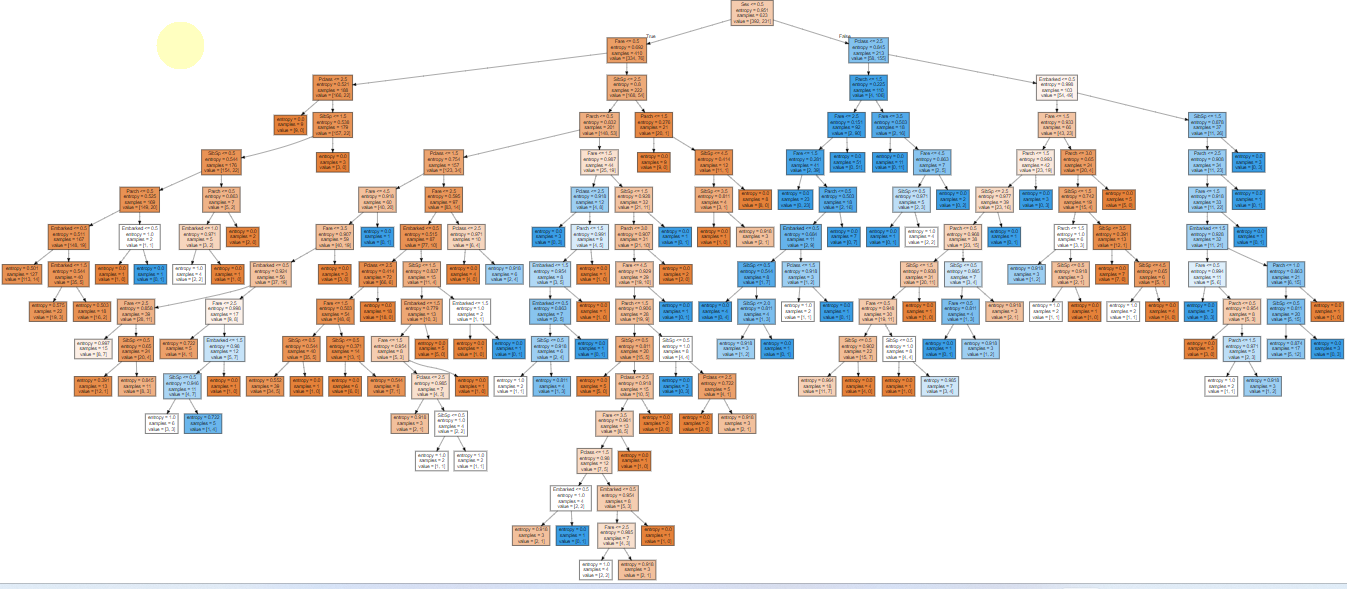